<a href="https://colab.research.google.com/github/Tstrebe2/math-for-ml/blob/main/probability/random-experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1.3.1 Random Experiments


Example:
Lets take the most basic probability example of a coin flip. We know that the coin has a 50% chance or .5 probability of landing on heads if we were to flip it in an unbiased manner. Lets say we want to test this hypothesis by conducting an experiment. We can use Python and the Numpy library to simulate an experiment in which we will run several trials of coin flips and obtain a sample proportion of heads and tails. Our sample space will be composed of all possible outcomes of our coin flip. For this experiment, the sample space is: $(H,T)$  
From our sample space, we can calculate the probability of a random event (a coin flip) producing an outcome within our sample space. If the event is truly random, each outcome with have equal probability of occuring. The formula to compute the probability under these conditions is $P(e)=F/N$ where $F$ is the frequency that an event can occur and $N$ is the number of possible events. $N$ can be derived from the length of our sample space which in this case is 2. So the probability of heads or $P(H)=1/2$ and the probability of tails can be defined as $P(T)=1-P(H)$.

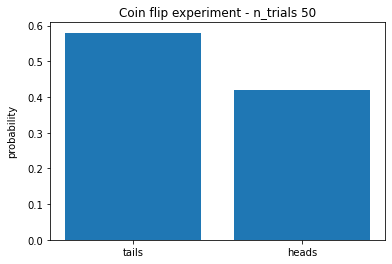

In [9]:
def run_coinflip_experiment(n_trials = 50):
  # This is our sample space
  #   0: tails
  #   1: heads
  sample_space = np.array([0, 1])
  # This is the probability of the event occuring p(heads)
  p_event = .5
  # We will run a number of trials for our experiment and
  # observe the distribution of successes and failure
  trials = np.zeros(n_trials)

  for i in range(n_trials):
    # We'll run our trials using the 1-p_event for the probability of
    # tails and p_event for heads
    trials[i] = np.random.choice(sample_space, p=[1-p_event, p_event])

  return trials

def plot_single_coinflip_experiment(experiment):
  x = np.array([0, 1])
  n_trials = len(experiment)
  n_heads = experiment.sum()
  n_tails = n_trials-n_heads
  y = np.array([n_tails/n_trials, n_heads/n_trials])
  plt.bar(x, y)
  plt.xticks(x, labels=['tails', 'heads'])
  plt.ylabel('probability', labelpad=10)
  plt.title('Coin flip experiment - n_trials %.f' % len(experiment))
  plt.show()

experiment = run_coinflip_experiment(n_trials = 50)
plot_single_coinflip_experiment(experiment)

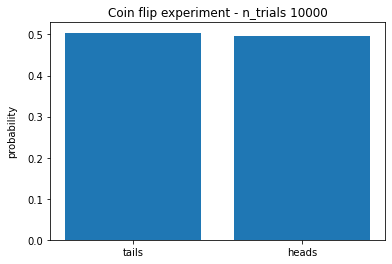

In [10]:
experiment = run_coinflip_experiment(n_trials = 10000)
plot_single_coinflip_experiment(experiment)

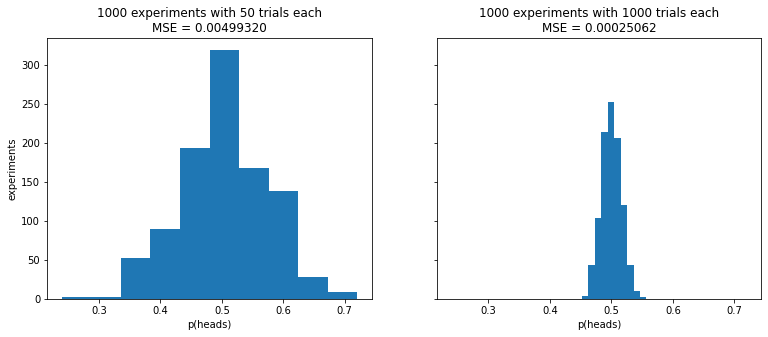

In [11]:
n_experiments = 1000

def run_coinflip_experiments(n_experiments, n_trials):
  experiments = np.zeros(n_experiments)
  for i in range(n_experiments):
    experiment = run_coinflip_experiment(n_trials)
    experiments[i] = experiment.sum() / n_trials
  return experiments

experiments_50 = run_coinflip_experiments(n_experiments=n_experiments, n_trials=50)
experiments_1000 = run_coinflip_experiments(n_experiments=n_experiments, n_trials=1000)
# We can calculate the mean-squared error by using the sum of squares of the
# differences of the observed probabilities from our experiments and what
# we would expect the probability of heads would be using a fair two-sided coin (.5).
expected_p_event = .5
mse_50 = np.sum((experiments_50 - expected_p_event)**2) / n_experiments
mse_1000 = np.sum((experiments_1000 - expected_p_event)**2) / n_experiments

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(6.4*2, 4.8))
ax1.hist(experiments_50)
ax2.hist(experiments_1000)
ax1.set_xlabel('p(heads)')
ax2.set_xlabel('p(heads)')
ax1.set_ylabel('experiments')
ax1.set_title('1000 experiments with 50 trials each\nMSE = %.8f' % mse_50)
ax2.set_title('1000 experiments with 1000 trials each\nMSE = %.8f' % mse_1000)
plt.show()

Example:  
If we altered our experiment and instead of tossing the coin once, We toss a coin three times and observe the sequence of heads/tails. The sample space changes and becomes defined as:  
${(H,H,H),(H,H,T),(H,T,H),(T,H,H),(H,T,T),(T,H,T),(T,T,H),(T,T,T)}$

(1, array([0., 0., 0.]))